## EDA sobre las Ventas de Videojuegos y sus Ratings

Análisis inspirado en el set de datos proporcionado por *Gregory Smith* donde se recopila información sobre las ventas de videojuegos en todo el mundo y su posterior ampliación por *Rush Kirubi* donde se complementa la información con las puntuaciónes ofrecidas por los usuarios y críticos de "Metacritic".

---

**Características sobre las Ventas de Videojuegos** (Gregory Smith):

1. Nombre
2. Plataforma
3. Año de lanzamiento
4. Genero
5. Empresa/Desarrolladores
6. Ventas en Norte-America
7. Ventas en Europa
8. Ventas en Japón
9. Ventas en otras regiones
10. Ventas globales

**Características sobre el Rating de Videojuegos** (Rush Kirubi):

11. Puntuación de la crítica
12. Conteo de puntuaciones de la crítica
13. Puntuación de los usuarios
14. Conteo de puntuaciones de los usuarios
15. Desarrolladores
16. ESRB Rating

---

**Fuentes de datos**:

[Gregory Smith's Dataset](https://www.kaggle.com/gregorut/videogamesales)

[Rush Kirubi's Dataset](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings)

---

In [1]:
#Importo los paquetes de tratamiento y visualización de datos.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Lectura de datos

In [2]:
#Cargo el archivo indicando el path.
file = "C:/Users/Miguel/Desktop/Video_Games_Sales_as_at_22_Dec_2016.csv"
df_videogames = pd.read_csv(file)

## Análisis descriptivo

In [3]:
#Visualizo el tamaño del set.
df_videogames.shape

(16719, 16)

In [4]:
#Obtengo información de las distintas variables.
df_videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
#Observo 5 muestras del set.
df_videogames.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
12409,Tron 2.0: Killer App,GBA,2004.0,Action,Disney Interactive Studios,0.04,0.02,0.00,0.00,0.06,68.0,16.0,tbd,NaN,Digital Eclipse,E
5286,Assassin's Creed III,WiiU,2012.0,Action,Ubisoft,0.19,0.13,0.00,0.03,0.35,85.0,26.0,7.1,216.0,Ubisoft Quebec,M
12530,Call of Duty 2,PC,2005.0,Shooter,Activision,0.00,0.05,0.00,0.01,0.06,86.0,64.0,8.4,626.0,Infinity Ward,T
11795,Animal Kingdom: Wildlife Expedition,Wii,2009.0,Adventure,Natsume,0.07,0.00,0.00,0.01,0.07,NaN,NaN,tbd,NaN,Success,E
770,R.C. Pro-Am,NES,1988.0,Racing,Nintendo,1.47,0.38,0.19,0.10,2.14,NaN,NaN,NaN,NaN,NaN,NaN


## Limpieza de datos

In [6]:
#Calculo la suma de valores NaN.
miss_values = df_videogames.isnull().sum()

#Calculo el porcentaje equivalente a dichas sumas redondeando el resultado.
miss_values_percent = (miss_values*100/len(df_videogames)).round(2)

#Junto ambos calculos en una misma tabla.
miss_values_table = pd.concat([miss_values,miss_values_percent], axis=1)

#Renombro las columnas y selecciono las filas cuyo valor es distinto de 0 para su visualización.
miss_values_table = miss_values_table.rename(columns={0:"Total de NaN", 1:"% de NaN"})
miss_values_table[miss_values_table.loc[:,"Total de NaN"] != 0]

,Total de NaN,% de NaN
Name,2,0.01
Year_of_Release,269,1.61
Genre,2,0.01
Publisher,54,0.32
Critic_Score,8582,51.33
Critic_Count,8582,51.33
User_Score,6704,40.10
User_Count,9129,54.60
Developer,6623,39.61
Rating,6769,40.49


In [7]:
#Elimino todas las filas que posean valores NaN.
df_videogames = df_videogames.dropna(axis=0)

#Elimino todas las columnas que no me interesan.
df_videogames = df_videogames.drop(labels=["Critic_Count","User_Count","Developer"], axis=1)

#Cuento los posibles duplicados y los elimino.
duplicated_rows = df_videogames.duplicated().sum()   #Conteo: 0 duplicados.
df_videogames = df_videogames.drop_duplicates().reset_index(drop=True)

#Visualizo el tamaño final del set.
df_videogames.shape

(6825, 13)

In [8]:
#Transformo las columnas "User_Score", "Year_of_Release" y "Critic_Score" para poder trabajar mejor con ellas.
df_videogames["User_Score"] = pd.to_numeric(df_videogames.User_Score, errors="coerce")
df_videogames["Year_of_Release"] = df_videogames["Year_of_Release"].astype("int")
df_videogames["Critic_Score"] = df_videogames["Critic_Score"].apply(lambda x: x/10)

#Genero dos nuevas columnas para agrupar los Ratings de forma categórica.
df_videogames["Critic_Category"] = df_videogames["Critic_Score"].apply(lambda x: "*" if 0<=x<=1.9 else "**" if 2<=x<=3.9 else "***" if 4<=x<=5.9 else "****" if 6<=x<=7.9 else "*****")
df_videogames["User_Category"] = df_videogames["User_Score"].apply(lambda x: "*" if 0<=x<=1.9 else "**" if 2<=x<=3.9 else "***" if 4<=x<=5.9 else "****" if 6<=x<=7.9 else "*****")

#Compruebo el resultado final de las transformaciones.
df_videogames.dtypes

Name                object
Platform            object
Year_of_Release      int32
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
User_Score         float64
Rating              object
Critic_Category     object
User_Category       object
dtype: object

In [9]:
#Obtengo un análisis descriptivo de las variables cuantitativas redondeando el resultado.
df_videogames.describe().round(2)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
count,6825.00,6825.00,6825.00,6825.00,6825.00,6825.00,6825.00,6825.00
mean,2007.44,0.39,0.24,0.06,0.08,0.78,7.03,7.19
std,4.21,0.97,0.69,0.29,0.27,1.96,1.39,1.44
min,1985.00,0.00,0.00,0.00,0.00,0.01,1.30,0.50
25%,2004.00,0.06,0.02,0.00,0.01,0.11,6.20,6.50
50%,2007.00,0.15,0.06,0.00,0.02,0.29,7.20,7.50
75%,2011.00,0.39,0.21,0.01,0.07,0.75,8.00,8.20
max,2016.00,41.36,28.96,6.50,10.57,82.53,9.80,9.60


## Análisis general

In [10]:
#Realizo un conteo de los videojuegos vendidos según su genero y plataforma.
plataforma_X_genero = df_videogames.groupby(["Platform","Genre"])["Name"].agg("count").reset_index()
plataforma_X_genero.pivot(index="Platform",columns="Genre", values="Name")

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,54.0,9.0,7.0,10.0,18.0,8.0,5.0,26.0,2.0,9.0,4.0,3.0
DC,NaN,2.0,2.0,NaN,1.0,NaN,2.0,4.0,1.0,1.0,1.0,NaN
DS,75.0,31.0,14.0,37.0,35.0,52.0,18.0,89.0,27.0,37.0,22.0,27.0
GBA,51.0,9.0,13.0,12.0,48.0,6.0,21.0,31.0,13.0,8.0,19.0,6.0
GC,69.0,13.0,24.0,16.0,44.0,6.0,31.0,22.0,40.0,10.0,66.0,7.0
PC,130.0,25.0,3.0,3.0,10.0,4.0,43.0,83.0,129.0,78.0,28.0,115.0
PS,27.0,5.0,15.0,4.0,16.0,2.0,17.0,28.0,12.0,4.0,16.0,4.0
PS2,243.0,40.0,73.0,54.0,70.0,6.0,131.0,117.0,127.0,45.0,196.0,38.0
PS3,228.0,19.0,56.0,41.0,22.0,1.0,62.0,78.0,121.0,18.0,115.0,8.0


In [11]:
#Sumo las ventas de videojuegos obtenidas por zonas y globalmente según su desarrollador.
ventas_desarrollador = df_videogames.groupby(["Publisher"])["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"].agg("sum").reset_index()

#Ordeno los datos para observar el top10 de los desarrolladores con más ingresos.
ventas_desarrollador = ventas_desarrollador.sort_values(by=["Global_Sales"],ascending=False).reset_index(drop=True)
ventas_desarrollador.head(10)

,Publisher,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Electronic Arts,868.55,465.45,289.24,10.85,102.92
1,Nintendo,849.49,371.36,242.11,173.80,62.41
2,Activision,535.74,306.82,166.54,5.31,57.01
3,Sony Computer Entertainment,388.10,176.87,117.53,39.92,53.78
4,Take-Two Interactive,350.17,187.82,106.24,5.56,50.55
5,Ubisoft,340.23,174.92,121.28,6.41,37.59
6,Microsoft Game Studios,216.49,138.90,58.16,2.83,16.61
7,THQ,162.87,93.97,47.25,2.51,19.11
8,Sega,148.42,69.99,49.05,12.87,16.35
9,Konami Digital Entertainment,137.87,51.23,45.21,21.76,19.59


In [12]:
#Sumo las ventas de videojuegos por zonas y globalmente según su nombre.
ventas_ratings = df_videogames.groupby(["Name"])["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"].agg("sum").reset_index()

#Ordeno los datos para observar el top10 de los videojuegos más vendidos.
ventas_ratings = ventas_ratings.sort_values(by=["Global_Sales"],ascending=False).reset_index(drop=True)
ventas_ratings.iloc[:10,]

,Name,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,82.53,41.36,28.96,3.77,8.45
1,Grand Theft Auto V,56.57,23.84,23.42,1.42,7.90
2,Mario Kart Wii,35.52,15.68,12.76,3.79,3.29
3,Wii Sports Resort,32.77,15.61,10.93,3.28,2.95
4,Call of Duty: Modern Warfare 3,30.59,15.54,11.15,0.62,3.29
5,New Super Mario Bros.,29.80,11.28,9.14,6.50,2.88
6,Call of Duty: Black Ops II,29.40,14.08,10.84,0.72,3.76
7,Call of Duty: Black Ops,29.19,16.99,8.54,0.59,3.08
8,Wii Play,28.92,13.96,9.18,2.93,2.84
9,New Super Mario Bros. Wii,28.32,14.44,6.94,4.70,2.24


In [13]:
#Realizo una suma de las ventas globales de videojuegos según su las puntuaciones de criticos y usuarios.
ratings = df_videogames.groupby(["User_Category","Critic_Category"])["Global_Sales"].agg("sum").reset_index()
ratings.pivot(index="Critic_Category",columns="User_Category", values="Global_Sales")

User_Category,*,**,***,****,*****
Critic_Category,,,,,
*,0.20,0.34,0.22,NaN,NaN
**,2.94,12.87,23.52,5.87,0.60
***,0.99,25.42,112.48,201.83,45.60
****,1.34,53.73,175.67,1106.63,597.73
*****,NaN,28.99,167.09,987.76,1755.23


In [14]:
#Genero una tabla de correlaciones para observar la interacción de las variables.
df_videogames.corr().round(2)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
Year_of_Release,1.00,-0.02,0.04,-0.04,0.04,0.01,-0.01,-0.25
NA_Sales,-0.02,1.00,0.84,0.47,0.73,0.96,0.23,0.09
EU_Sales,0.04,0.84,1.00,0.52,0.72,0.94,0.21,0.06
JP_Sales,-0.04,0.47,0.52,1.00,0.39,0.61,0.15,0.13
Other_Sales,0.04,0.73,0.72,0.39,1.00,0.80,0.19,0.06
Global_Sales,0.01,0.96,0.94,0.61,0.80,1.00,0.24,0.09
Critic_Score,-0.01,0.23,0.21,0.15,0.19,0.24,1.00,0.58
User_Score,-0.25,0.09,0.06,0.13,0.06,0.09,0.58,1.00


## Visualización de datos

Text(0, 0.5, 'Número total de videojuegos')

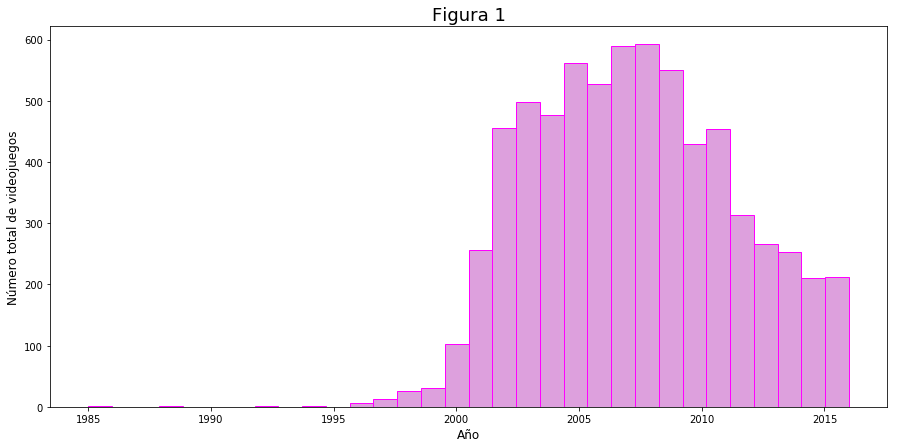

In [15]:
#Creo un histograma para representar la distribución de publicaciones de videojuegos.
historico = df_videogames.Year_of_Release.max()-df_videogames.Year_of_Release.min()+1

fig, ax = plt.subplots(figsize=(15,7))
ax.hist(df_videogames["Year_of_Release"], bins=historico, color="plum", edgecolor="magenta")

ax.set_title("Figura 1", fontsize=18)
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Número total de videojuegos", fontsize=12)

Text(0, 0.5, 'Número total')

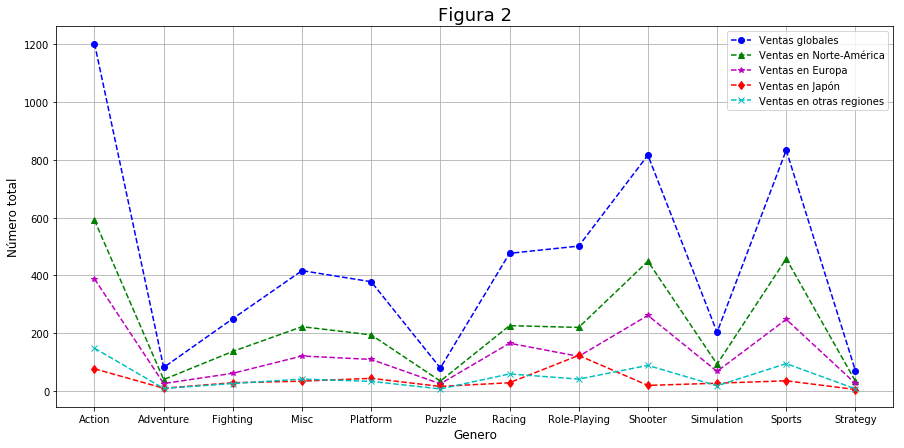

In [16]:
#Creo un gráfico de lineas representando el número de ventas por cada región y el computo global según el género.
genre_global = df_videogames.groupby(["Genre"])["Global_Sales"].agg("sum")
genre_na = df_videogames.groupby(["Genre"])["NA_Sales"].agg("sum")
genre_eu = df_videogames.groupby(["Genre"])["EU_Sales"].agg("sum")
genre_jp = df_videogames.groupby(["Genre"])["JP_Sales"].agg("sum")
genre_other = df_videogames.groupby(["Genre"])["Other_Sales"].agg("sum")

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(genre_global,"bo--",genre_na, "g^--", genre_eu, "m*--", genre_jp, "rd--", genre_other, "cx--")

ax.grid()
plt.legend(("Ventas globales","Ventas en Norte-América", "Ventas en Europa", "Ventas en Japón", "Ventas en otras regiones"))
ax.set_title("Figura 2",fontsize=18)
ax.set_xlabel("Genero",fontsize=12)
ax.set_ylabel("Número total",fontsize=12)

Text(0, 0.5, 'Valor total')

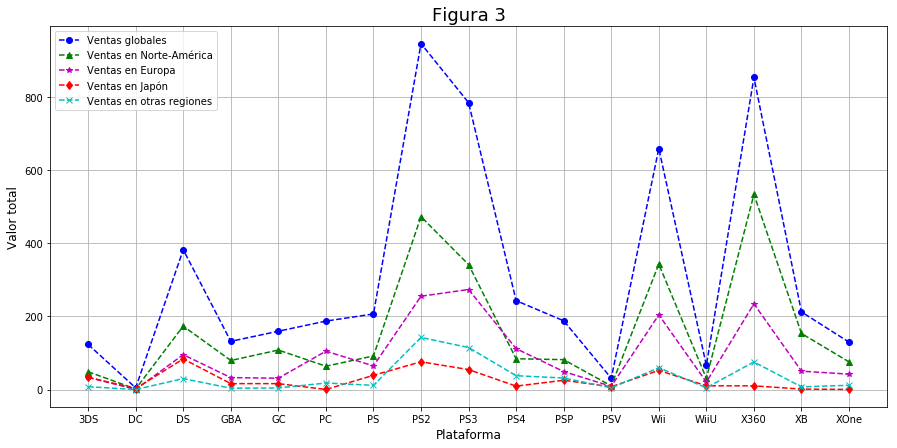

In [17]:
#Creo un gráfico de lineas representando el número de ventas por cada región y el computo global según la plataforma.
platform_global = df_videogames.groupby(["Platform"])["Global_Sales"].agg("sum")
platform_na = df_videogames.groupby(["Platform"])["NA_Sales"].agg("sum")
platform_eu = df_videogames.groupby(["Platform"])["EU_Sales"].agg("sum")
platform_jp = df_videogames.groupby(["Platform"])["JP_Sales"].agg("sum")
platform_other = df_videogames.groupby(["Platform"])["Other_Sales"].agg("sum")

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(platform_global,"bo--",platform_na, "g^--", platform_eu, "m*--", platform_jp, "rd--", platform_other, "cx--")

ax.grid()
plt.legend(("Ventas globales","Ventas en Norte-América", "Ventas en Europa", "Ventas en Japón", "Ventas en otras regiones"))
ax.set_title("Figura 3",fontsize=18)
ax.set_xlabel("Plataforma",fontsize=12)
ax.set_ylabel("Valor total",fontsize=12)

Text(0, 0.5, 'Puntuación de los críticos')

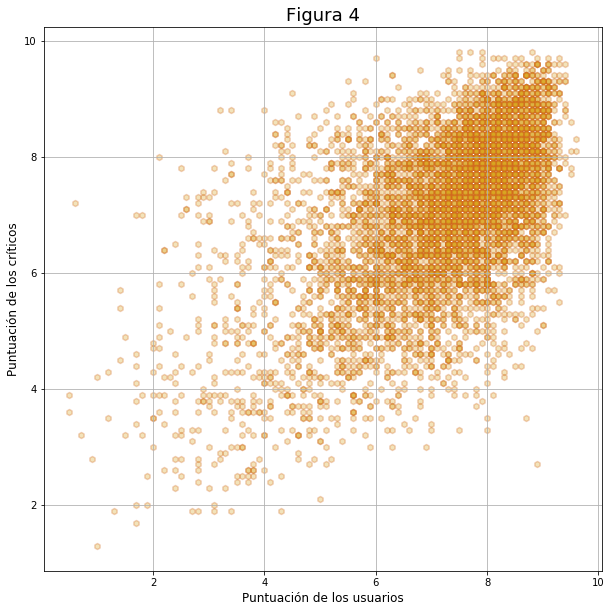

In [18]:
#Creo un gráfico de tipo scatter para observar la relación entre las puntuaciones otorgadas por usuarios y críticos.
users = df_videogames.User_Score
critics = df_videogames.Critic_Score
g_sales = df_videogames.Global_Sales
year = df_videogames.Year_of_Release

fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(users, critics, c="goldenrod", edgecolors="chocolate", marker="h", linewidths=1.5, alpha=0.3)

ax.grid()
ax.set_title("Figura 4",fontsize=18)
ax.set_xlabel("Puntuación de los usuarios",fontsize=12)
ax.set_ylabel("Puntuación de los críticos",fontsize=12)

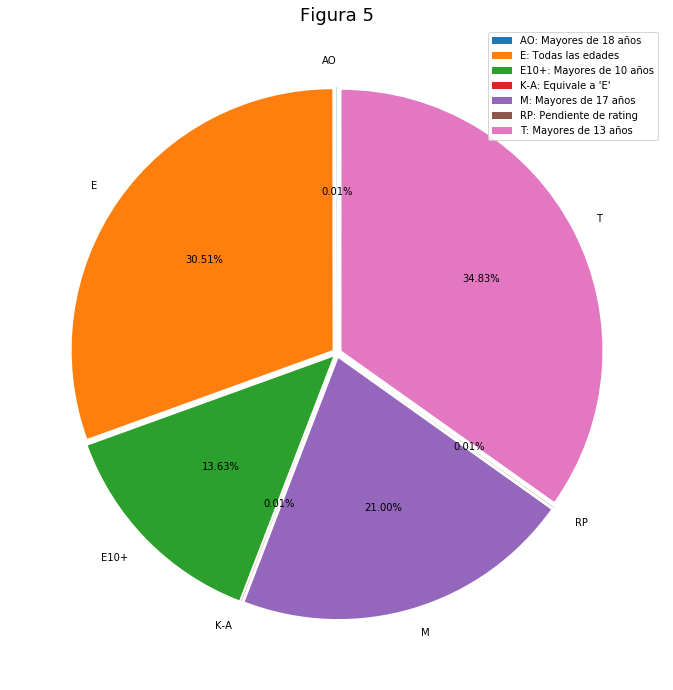

In [19]:
#Creo un gráfico de sectores agrupando los diferentes Ratings de videojuegos.
ratings = df_videogames.groupby(["Rating"])["Name"].agg("count")
labels = ["AO","E", "E10+", "K-A", "M", "RP", "T"]
explode= [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

fig,ax = plt.subplots(figsize=(12,12))
ax.pie(ratings, labels=labels, explode=explode, autopct="%.2f%%", startangle=90)

ax.set_title("Figura 5", fontsize=18)
plt.legend(["AO: Mayores de 18 años", "E: Todas las edades", "E10+: Mayores de 10 años", "K-A: Equivale a 'E'", "M: Mayores de 17 años", "RP: Pendiente de rating", "T: Mayores de 13 años"])